<a href="https://colab.research.google.com/github/phuocsu05/sule.github.io/blob/main/Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##2.2 THỰC HÀNH 1

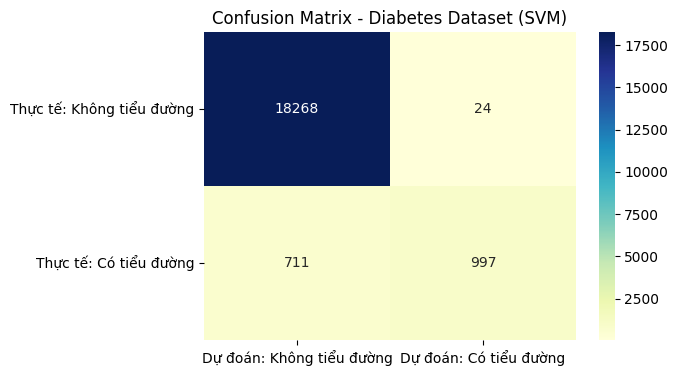

Báo cáo đánh giá mô hình SVM trên Diabetes Dataset:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18292
           1       0.98      0.58      0.73      1708

    accuracy                           0.96     20000
   macro avg       0.97      0.79      0.86     20000
weighted avg       0.96      0.96      0.96     20000



In [11]:
# 1. Chuẩn bị dữ liệu và xây dựng mô hình SVM
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Đọc dữ liệu diabetes.csv
data = pd.read_csv("diabetes.csv")

# One-hot encode categorical features
categorical_cols = ['gender', 'smoking_history']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Tách features (X) và target (y)
X = data.drop("diabetes", axis=1)   # "diabetes" là nhãn: 0 = Không tiểu đường, 1 = Có tiểu đường
y = data["diabetes"]

# Chia dữ liệu thành train (80%) và test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Khởi tạo mô hình SVM
svc = svm.SVC(kernel="rbf", gamma=0.001, C=100)

# Huấn luyện mô hình
svc.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred = svc.predict(X_test)
# 2. Đánh giá hiệu quả của mô hình với Confusion Matrix
cm = confusion_matrix(y_test, y_pred)   # y_true, y_pred
conf_matrix = pd.DataFrame(data=cm,
                           index=["Thực tế: Không tiểu đường", "Thực tế: Có tiểu đường"],
                           columns=["Dự đoán: Không tiểu đường", "Dự đoán: Có tiểu đường"])

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion Matrix - Diabetes Dataset (SVM)")
plt.show()
# 3. In kết quả dạng văn bản (Classification Report)
print("Báo cáo đánh giá mô hình SVM trên Diabetes Dataset:")
print(classification_report(y_test, y_pred))

Theo kết quả trên, ta thấy mô hình SVM hoạt động khá tốt với độ chính xác tổng thể 96%, tức là dự đoán đúng phần lớn các trường hợp. Tuy nhiên, khi phân tích chi tiết thì mô hình lại dự đoán rất chính xác nhóm không bị tiểu đường (recall = 1.00, f1-score = 0.98), nhưng với nhóm có tiểu đường thì recall chỉ đạt 0.58, nghĩa là bỏ sót khá nhiều bệnh nhân thật sự. Điều này dẫn đến sự mất cân bằng trong hiệu quả phân loại: Precision cao nhưng recall thấp ở lớp dương tính. Với bối cảnh ứng dụng y tế, việc bỏ sót bệnh nhân có thể gây rủi ro, nên cần cải thiện recall, ví dụ như dùng kỹ thuật cân bằng dữ liệu hoặc tinh chỉnh tham số mô hình để giảm thiểu lỗi loại II.

## 2.2 THỰC HÀNH 2

5 dòng đầu tiên của dữ liệu:
  AnimalName symptoms1             symptoms2 symptoms3    symptoms4  \
0        Dog     Fever              Diarrhea  Vomiting  Weight loss   
1        Dog     Fever              Diarrhea  Coughing    Tiredness   
2        Dog     Fever              Diarrhea  Coughing     Vomiting   
3        Dog     Fever  Difficulty breathing  Coughing     Lethargy   
4        Dog     Fever              Diarrhea  Coughing     Lethargy   

     symptoms5 Dangerous  
0  Dehydration       Yes  
1        Pains       Yes  
2     Anorexia       Yes  
3     Sneezing       Yes  
4     Blue Eye       Yes  


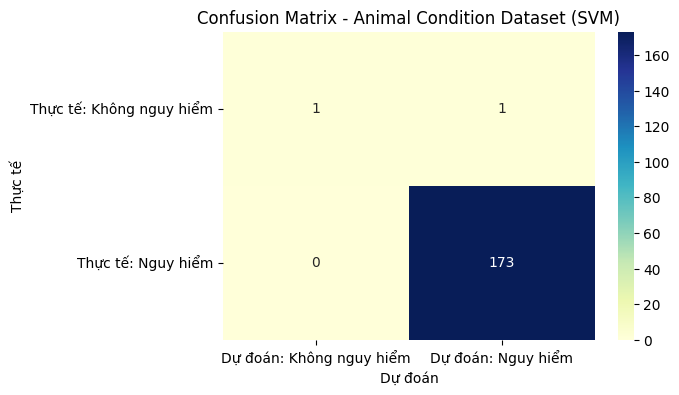

Báo cáo đánh giá mô hình SVM trên Animal Condition Dataset:
                 precision    recall  f1-score   support

Không nguy hiểm       1.00      0.50      0.67         2
      Nguy hiểm       0.99      1.00      1.00       173

       accuracy                           0.99       175
      macro avg       1.00      0.75      0.83       175
   weighted avg       0.99      0.99      0.99       175



In [66]:
# 1. Import thư viện
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

# 2. Đọc dữ liệu Animal Condition
data = pd.read_csv("animal_condition.csv")

print("5 dòng đầu tiên của dữ liệu:")
print(data.head())

# 3. Xử lý dữ liệu
# Encode cột nhãn (Dangerous) thành số
le = LabelEncoder()
data["Dangerous_encoded"] = le.fit_transform(data["Dangerous"])

# One-hot encoding cho các cột dạng chuỗi
categorical_cols = ['AnimalName', 'symptoms1', 'symptoms2', 'symptoms3', 'symptoms4', 'symptoms5']
data = pd.get_dummies(data.drop("Dangerous", axis=1), columns=categorical_cols, drop_first=True)

# 4. Tách features (X) và target (y)
X = data.drop("Dangerous_encoded", axis=1)
y = data["Dangerous_encoded"]

# 5. Chia dữ liệu train/test 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Khởi tạo và huấn luyện mô hình SVM
svc = svm.SVC(kernel="rbf", gamma=0.001, C=100)
svc.fit(X_train, y_train)

# 7. Dự đoán
y_pred = svc.predict(X_test)

# 8. Đánh giá mô hình bằng Confusion Matrix
# Tạo nhãn hiển thị dễ hiểu
labels = ["Không nguy hiểm", "Nguy hiểm"]

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(
    data=cm,
    index=[f"Thực tế: {cls}" for cls in labels],
    columns=[f"Dự đoán: {cls}" for cls in labels]
)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Animal Condition Dataset (SVM)")
plt.ylabel("Thực tế")
plt.xlabel("Dự đoán")
plt.show()

# 9. In báo cáo phân loại
print("Báo cáo đánh giá mô hình SVM trên Animal Condition Dataset:")
print(classification_report(y_test, y_pred, target_names=labels))

Dựa trên kết quả ma trận nhầm lẫn và báo cáo đánh giá, có thể thấy mô hình SVM phân loại trên tập dữ liệu Animal Condition đạt độ chính xác tổng thể 99%, cho thấy hiệu quả rất cao. Tuy nhiên, do dữ liệu mất cân bằng (chỉ có 2 mẫu “Không nguy hiểm” so với 173 mẫu “Nguy hiểm”), mô hình gần như học thiên về dự đoán “Nguy hiểm”. Cụ thể, nhóm “Nguy hiểm” được nhận diện rất tốt (recall = 1.00, f1-score = 1.00), trong khi nhóm “Không nguy hiểm” lại có recall chỉ đạt 0.50 (1 mẫu bị dự đoán sai). Điều này dẫn đến mô hình tuy có accuracy cao nhưng lại thiếu ổn định với lớp dữ liệu ít. Vì vậy, khi triển khai thực tế, cần bổ sung thêm dữ liệu cân bằng hơn hoặc áp dụng các kỹ thuật xử lý mất cân bằng để mô hình có khả năng phân loại tốt cho cả hai nhóm.

#2.3. GIẢI THUẬT 3: BAYES NGÂY THƠ (NAÏVE BAYES)

##2.3.1. ÔN TẬP LÝ THUYẾT

1. Cách hoạt động

Naïve Bayes dựa trên Định lý Bayes:

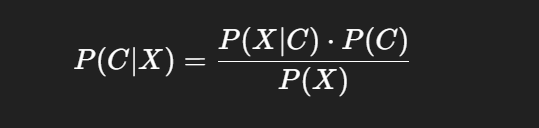	​


Giả định “ngây thơ” rằng các đặc trưng độc lập có điều kiện → giúp tính toán đơn giản.

2. Các loại mô hình

Gaussian NB: cho dữ liệu liên tục (giả định phân phối chuẩn).

Multinomial NB: cho dữ liệu rời rạc (đếm, tần suất, văn bản).

Bernoulli NB: cho dữ liệu nhị phân (có/không).

3. Vì sao “ngây thơ”?

Do giả định độc lập giữa các đặc trưng (thường không đúng). Điều này có thể làm giảm hiệu suất khi đặc trưng phụ thuộc nhau.

4. Ưu và nhược điểm

Ưu: Nhanh, đơn giản, hiệu quả với dữ liệu lớn và nhiều chiều (đặc biệt là văn bản).
Nhược: Giả định mạnh, xác suất không chính xác nếu đặc trưng phụ thuộc.


5. Code mẫu (Gaussian NB)

In [67]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = GaussianNB().fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))


Accuracy: 0.9777777777777777


6. Xử lý dữ liệu phân loại

One-Hot Encoding hoặc Label Encoding trước khi dùng Multinomial NB.

7. Phân loại văn bản

Tiền xử lý văn bản → TF-IDF hoặc Bag-of-Words → huấn luyện Multinomial NB.

##2.3.2. BÀI TOÁN 1

In [58]:
#Importing the Necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
data = pd.read_csv('spam.csv', encoding='latin-1')
#display the first 5 rows
data.head()
# Drop the columns with NaN values
data = data.drop(columns=['hotel', 'polarity', 'source'], axis=1)
# Rename columns for clarity:
data = data.iloc[:, :2]
data.columns = ['label', 'text']
# Separate features (X) and target labels (y)
X = data.drop('label', axis=1)
y = data['label']
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
# Fit and transform the training data (X_train)
X_train_vectorized = vectorizer.fit_transform(X_train['text'])
# Transform the test data (X_test)
X_test_vectorized = vectorizer.transform(X_test['text'])
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Make predictions on the test data
y_pred = classifier.predict(X_test_vectorized)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)
print(classification_rep)


Accuracy: 0.87
Confusion Matrix:
[[139  13]
 [ 29 139]]
Classification Report:
              precision    recall  f1-score   support

   deceptive       0.83      0.91      0.87       152
    truthful       0.91      0.83      0.87       168

    accuracy                           0.87       320
   macro avg       0.87      0.87      0.87       320
weighted avg       0.87      0.87      0.87       320

              precision    recall  f1-score   support

   deceptive       0.83      0.91      0.87       152
    truthful       0.91      0.83      0.87       168

    accuracy                           0.87       320
   macro avg       0.87      0.87      0.87       320
weighted avg       0.87      0.87      0.87       320



##2.3.2. THỰC HÀNH 1

5 dòng đầu tiên của dữ liệu:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
Độ chính xác của mô hình: 0.93

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        52
           1       0.96      0.82      0.88        28

    accuracy                           0.93        80
   macro avg       0.93      0.90      0.91        80
weighted avg       0.93      0.93      0.92        80



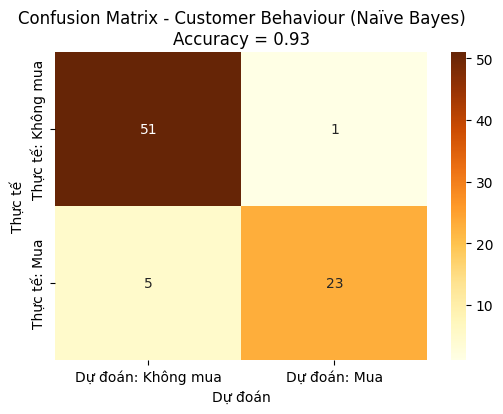

In [65]:
# 1. Import thư viện
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Đọc dữ liệu
file_path = "Customer_Behaviour.csv"
data = pd.read_csv(file_path)

print("5 dòng đầu tiên của dữ liệu:")
print(data.head())

# 3. Tách X (features) và y (target)
X = data.drop("Purchased", axis=1)   # các biến độc lập
y = data["Purchased"]                # biến mục tiêu

# Nếu có biến categorical (chuỗi), cần one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# 4. Chia train/test 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Khởi tạo mô hình Naïve Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# 6. Dự đoán
y_pred = model.predict(X_test)

# 7. Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của mô hình: {accuracy:.2f}")
print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred))
# 8. Vẽ Confusion Matrix với nhãn "Không mua" và "Mua"
cm = confusion_matrix(y_test, y_pred)
labels = ["Không mua", "Mua"]

conf_matrix = pd.DataFrame(
    cm,
    index=[f"Thực tế: {label}" for label in labels],
    columns=[f"Dự đoán: {label}" for label in labels]
)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlOrBr")
plt.title(f"Confusion Matrix - Customer Behaviour (Naïve Bayes)\nAccuracy = {accuracy:.2f}")
plt.ylabel("Thực tế")
plt.xlabel("Dự đoán")
plt.show()


Kết quả cho thấy mô hình Naïve Bayes trong bài toán dự đoán hành vi mua hàng đạt độ chính xác 93%, tức là khả năng phân loại tổng thể khá tốt. Cụ thể, nhóm khách hàng không mua được nhận diện chính xác cao (recall = 0.98, precision = 0.91, f1-score = 0.94), trong khi nhóm mua hàng có precision = 0.96 nhưng recall chỉ đạt 0.82, dẫn đến một số khách hàng tiềm năng bị bỏ sót (5 trường hợp). Ma trận nhầm lẫn minh họa rõ điều này: 51 khách hàng không mua được dự đoán đúng, chỉ sai 1, còn 23 khách hàng mua được dự đoán đúng, sai 5. Như vậy, mô hình có xu hướng hoạt động ổn định, tuy nhiên để giảm thiểu việc bỏ sót khách hàng tiềm năng (FN), cần cải thiện recall ở nhóm “mua” bằng cách điều chỉnh tham số hoặc thử nghiệm thêm các mô hình khác như SVM, Random Forest.

## 2.3.2. THỰC HÀNH 2

Accuracy: 0.8073846153846154
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.94      0.84       843
           1       0.91      0.66      0.77       782

    accuracy                           0.81      1625
   macro avg       0.83      0.80      0.80      1625
weighted avg       0.83      0.81      0.80      1625



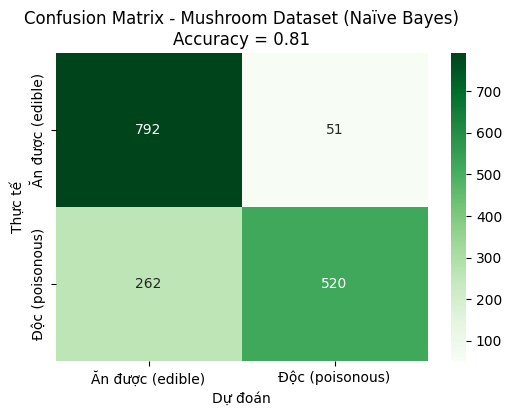

In [32]:
# Bài tập thực hành 2: Naïve Bayes trên Mushroom Dataset
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Nạp dữ liệu
data = pd.read_csv("mushrooms.csv")

# Encode tất cả cột
le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

X = data.drop("class", axis=1)
y = data["class"]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Huấn luyện
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 3. Đánh giá
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
print("Classification Report:\n", classification_report(y_test, y_pred))

# 4. Vẽ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
class_names = ["Ăn được (edible)", "Độc (poisonous)"]

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_names, yticklabels=class_names)
plt.title(f"Confusion Matrix - Mushroom Dataset (Naïve Bayes)\nAccuracy = {acc:.2f}")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

Kết quả cho thấy mô hình Naïve Bayes trên tập dữ liệu nấm đạt độ chính xác 81%, mức chấp nhận được nhưng chưa thật sự tốt trong bối cảnh nhạy cảm như nhận diện nấm độc. Nhìn vào báo cáo phân loại, nhóm ăn được (edible) có recall khá cao (0.94) nhưng precision thấp hơn (0.75), tức là mô hình dễ nhầm nấm độc thành nấm ăn được. Ngược lại, nhóm độc (poisonous) có precision cao (0.91) nhưng recall thấp (0.66), dẫn đến nhiều trường hợp nấm độc bị dự đoán sai thành nấm ăn được (262 mẫu). Ma trận nhầm lẫn cũng phản ánh rõ: trong khi 792 nấm ăn được được nhận diện đúng thì có tới 262 nấm độc bị phân loại sai. Điều này đặc biệt nguy hiểm vì lỗi loại II (FN) trong bài toán này có thể gây hậu quả nghiêm trọng. Do đó, mặc dù accuracy đạt 0.81, mô hình chưa phù hợp để ứng dụng thực tế. Cần cải thiện recall ở nhóm “độc” (ví dụ bằng cách cân nhắc lại đặc trưng, sử dụng mô hình mạnh hơn như Random Forest hoặc SVM) để đảm bảo an toàn khi triển khai.